### Final: due 12:00 nootime, Thursday, Jan 13, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Final (e.g., b88501045-Final), put this Jupyter notebook and all output files into this folder and compress this folder to a .zip file (e.g., b88501045-Final.zip).
### - Submit the Final directly through the NTU COOL course website.

## A tropical cyclone is a rotating, organized system of clouds and thunderstorms that originates over tropical or subtropical waters and has a closed low-level circulation. As quoted by WMO (World Meteorological Organization):

## _Tropical Cyclone (TC) are one of the biggest threats to life and property even in the formative stages of their development. They include a number of different hazards that can individually cause significant impacts on life and property, such as storm surge, flooding, extreme winds, tornadoes and lighting._

## Mexico (MX) country is located between Atlantics and East Pacific. Every year, MX suffers from TCs and the financial and societal losses resulting from them. 

## In this final project, your task is to analyse TCs and MX's rainfall monitoring network. Specific analyses you are required to do include:

### Q1. (35%) Characterising the rain gauge network covered the entire MX
### Q2. (25%) Analysing historical records of TC tracks for the period 1979 - 2019
### Q3. (40%) Identifying those _hotspot_ states prone to be impacted by TCs, and perfoming structural analysis on rainfall data of a given state for a given TC event 
### Q4. (10% bonus) download satellite data and make some plots 


### Import essential modules here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

### Q1. (35%) Characterising the rain gauge network covered the entire MX.

### From the enclosed csv file _MX_RG_Stns_xy_, you can find the name, ID, coordinates (X and Y)

#### Q1.1 (5%) Import _MX_RG_Stns_xy.csv_ file for the name, ID, coordinates (X and Y in metres) of all gauge stations, as well as the States and Cities these stations belonging to.

#### *Hint: pandas by default would make ID column 'integer type', but it is better if you convert it into 'string type'. This conversion will make your following analyses easier.

In [2]:
#read csv
station = pd.read_csv('./Files/MX_RG_Stns_xy.csv')
#convert ID from int64 to string
station.ID = station.ID.astype(str)
# station

#### Q1.2 (2%) Please calculate and print out how many gauges there are in this network?

In [3]:
ID = station['ID']
print(f'There are {len(ID.unique())} gauges in this network.')

There are 5467 gauges in this network.


#### Q1.3 (4%) Please calculate and print out how many states and cities are minitored by this gauge network?

In [4]:
State = station['State']
print(f'There are {len(State.unique())} states in this network.')

City = station['City']
print(f'There are {len(City.unique())} cities in this network.')


There are 32 states in this network.
There are 1599 cities in this network.


#### Q1.4 (2%) Please make a _horizontal bar_ chart summarising the the number of gauges in each state, where the y-axis is the name of each state and the bar width represents the number of gauges. 

In [5]:
from collections import Counter

num_gauges_eachstate = Counter(station['State'])
df_num_gauges_eachstate = pd.DataFrame.from_dict(num_gauges_eachstate, orient='index').reset_index()
df_num_gauges_eachstate.rename(columns={'index':'state', 0:'gauge'}, inplace=True)
df_num_gauges_eachstate.sort_values(['gauge'], ascending=[True], inplace=True)
df_num_gauges_eachstate.reset_index(inplace=True, drop=True)
# df_num_gauges_eachstate


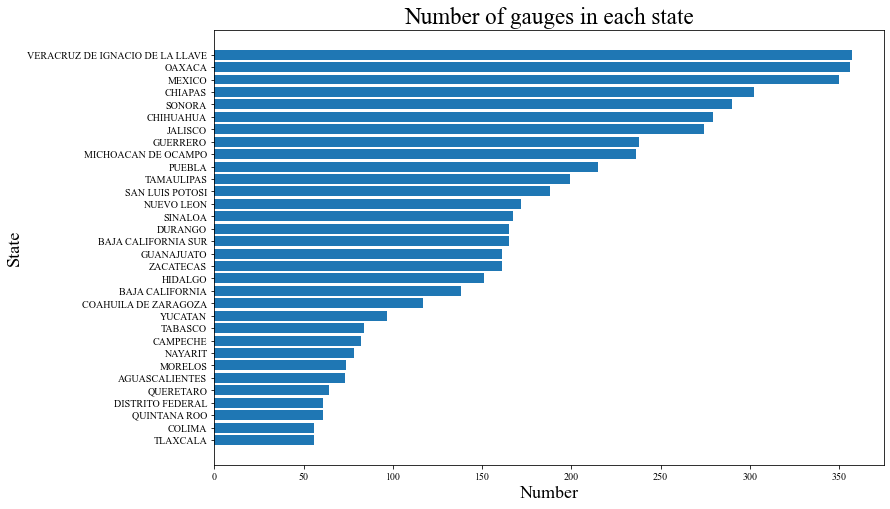

In [6]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.barh(df_num_gauges_eachstate['state'], df_num_gauges_eachstate['gauge'])
plt.title('Number of gauges in each state', fontsize= 23)
plt.ylabel('State',fontsize= 18)
plt.xlabel('Number',fontsize= 18)
plt.show()

#### Q1.5 (7%) What is the average number of gauges in each state, and which state has the highest number of gauges and how many gauges are there? 

In [7]:
mean = df_num_gauges_eachstate['gauge'].mean()
max = df_num_gauges_eachstate['gauge'].max()
idmax = df_num_gauges_eachstate['gauge'].idxmax()


print(f'THe average number of gauges in each state is {mean:.0f}.')
print(f'{df_num_gauges_eachstate.iloc[idmax, 0]} has the highest number of gauges and there are {max} gauges.')


THe average number of gauges in each state is 171.
VERACRUZ DE IGNACIO DE LA LLAVE has the highest number of gauges and there are 357 gauges.


#### Q1.6 (9%) What is the maximum, minimum and average distance (in km) between any two gauges in the state with the highest number of gauges?

In [8]:
from scipy.spatial import distance

# The state with highest number of gauges: VERACRUZ DE IGNACIO DE LA LLAVE.
station_max = station[station['State'] == 'VERACRUZ DE IGNACIO DE LA LLAVE']
# station_max

In [9]:
x = station_max['X']
y = station_max['Y']

# create a list of coordinates
pos_known = np.array((x,y)).T

#calculate distance between each pair of known locations
hs_known = distance.cdist(pos_known, pos_known, metric='euclidean')

df_hs_known = pd.DataFrame(hs_known)
for col in range(357):
    for row in range(col):
        df_hs_known[row][col] = np.nan
        
np.fill_diagonal(df_hs_known.values, np.nan)

new_hs_known = df_hs_known.to_numpy()
hs_known_ravel = new_hs_known.ravel() # flatten
hs_known_ravel = hs_known_ravel[np.logical_not(np.isnan(hs_known_ravel))] # drop NaN
hs_known_ravel.sort()
hs_known_ravel.shape

(63546,)

In [10]:
print(f'The maximum distance is {np.max(hs_known_ravel)*10**-3:.4f} km.')
print(f'The minimum distance is {np.min(hs_known_ravel)*10**-3:.4f} km.')
print(f'The average distance is {np.mean(hs_known_ravel)*10**-3:.4f} km.')

The maximum distance is 714.9739 km.
The minimum distance is 0.2326 km.
The average distance is 218.0838 km.


#### Q1.7 (6%) Please find a suitable probability distribution to fit distances between any two gauges in the state with the highest number of gauges, and plot the histogram of the these distances and the fitted probability distribution in a single plot to confirm your fitting result.

In [11]:
# Fit Gamma distribution by maximum likelihood
from scipy.stats import gamma

shape, loc, scale = gamma.fit(hs_known_ravel, floc=0)
print(shape, loc, scale) 

1.894548076703922 0 115111.2595507869


In [12]:
nbins = 20
nSamples = len(hs_known_ravel)
hist, bin_edge = np.histogram(hs_known_ravel, nbins, density=True)
hist = np.array(hist, dtype=float)
print(hist) # frequency


[1.49805307e-06 3.13481476e-06 3.36863786e-06 2.67069133e-06
 2.43598754e-06 2.31048926e-06 2.19820133e-06 2.00577065e-06
 1.94015927e-06 1.63147755e-06 1.18276618e-06 8.72323086e-07
 6.60076883e-07 5.56155506e-07 4.80856542e-07 4.17006543e-07
 2.72133098e-07 2.05200686e-07 1.11847584e-07 2.95031029e-08]


In [13]:
from scipy.stats import gamma

gammas = (gamma.cdf(bin_edge[1:], shape, loc=loc, scale=scale) - gamma.cdf(bin_edge[:-1],shape, loc=loc, scale=scale))
print(gammas)

[0.04960877 0.10131348 0.1179827  0.11714046 0.10765812 0.09451695
 0.08050204 0.06710208 0.05503724 0.04457956 0.03574926 0.02843443
 0.02246274 0.01764324 0.01378955 0.01073159 0.00832058 0.00642999
 0.00495442 0.00380747]


In [14]:
# degree of freedom = (number of bins) - 1 - (number of parameters of the testing distribution)
df = nbins-1-2
alpha = 0.05
q_upper = 1. - alpha/2
q_lower = alpha/2

CI_upper = stats.chi2.ppf(q_upper, df)
CI_lower = stats.chi2.ppf(q_lower, df)
CI_upper,CI_lower

(30.19100912163982, 7.564186449577567)

In [15]:
C = np.sum(((hist-gammas)**2)/gammas)
print('Test statistics =', C)


Test statistics = 0.9877087126876273


In [16]:
p_value = 1-stats.chi2.cdf(C,df)
print(p_value)

# P_value is > 0.05 The test is passed

0.9999999865858863


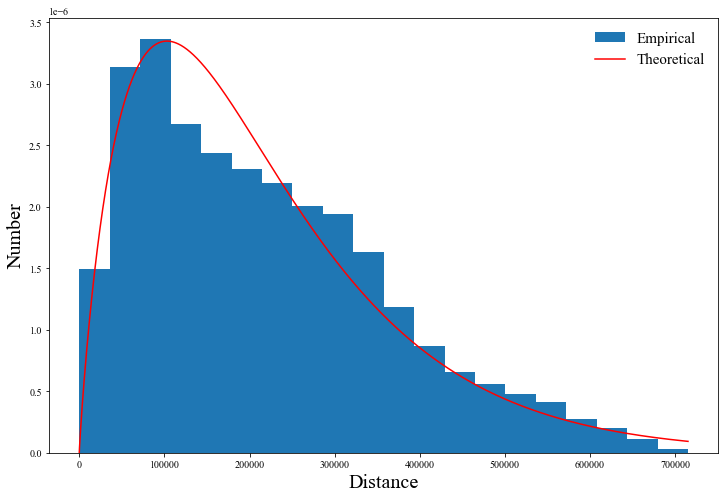

In [17]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.hist(hs_known_ravel, density=True, bins=nbins, label='Empirical')
x = np.linspace(0, 715000, 715000)
plt.plot(gamma.pdf(x, shape, loc=loc, scale=scale), color= 'red', label='Theoretical')
plt.ylabel('Number',fontsize= 20)
plt.xlabel('Distance',fontsize= 20)
plt.legend(frameon=False, fontsize=15)
plt.show()

### Q2. (25%) Analysing historical records of TC tracks for the period 1979 - 2019

#### Q2.1 (2%) Import _NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv_ file for records of TC tracks passing by Atlantic and East Pacific oceans. Each row of the file represents a track, and you can find:

##### - the 'order' of this track; 
##### - Which 'Ocean' this track come from?
##### - The registered 'Datetime' of this track;
##### - The 'name' and 'Record identifier' of the TC that this track belonged to;
##### - The registered 'X' and 'Y' coordinates (in metres);
##### - Some physical properties: Max sustained wind speed (kt)	and Min pressure (millibars)

In [18]:
#read csv
tracks = pd.read_csv('./Files/NHC_TC_1979-2019_(0_34,-120_-55)_xy.csv')
# tracks

#### Q2.2 (8%) Please count the number of TCs passing by 'Atlantic' ocean each year between 1979 and 2019, and make a plot visualising these counts, where the y-axis is the ''count and x-axis is year. 

In [19]:
# All the TC from Atlantic
tracks_atlantic = tracks[tracks['Ocean'] == 'Atlantic']
# convert from str to datetime
tracks_atlantic['Datetime'] = pd.to_datetime(tracks_atlantic['Datetime'], format='%d/%m/%Y %H:%M')
tracks_atlantic

date_range = np.arange(1979, 2020)

num_TC = []

for date in date_range:
    year = tracks_atlantic[tracks_atlantic['Datetime'].dt.year == date]
    num = len(year['Record identifier'].unique())
    num_TC.append([date, num])

df_num_TC = pd.DataFrame(num_TC)
df_num_TC.rename(columns={0:'year', 1:'count'}, inplace=True)
df_num_TC


<ipython-input-19-9e6b18dbd320>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks_atlantic['Datetime'] = pd.to_datetime(tracks_atlantic['Datetime'], format='%d/%m/%Y %H:%M')


,year,count
0,1979,16
1,1980,12
2,1981,19
3,1982,8
4,1983,6
5,1984,16
6,1985,13
7,1986,10
8,1987,11
9,1988,16


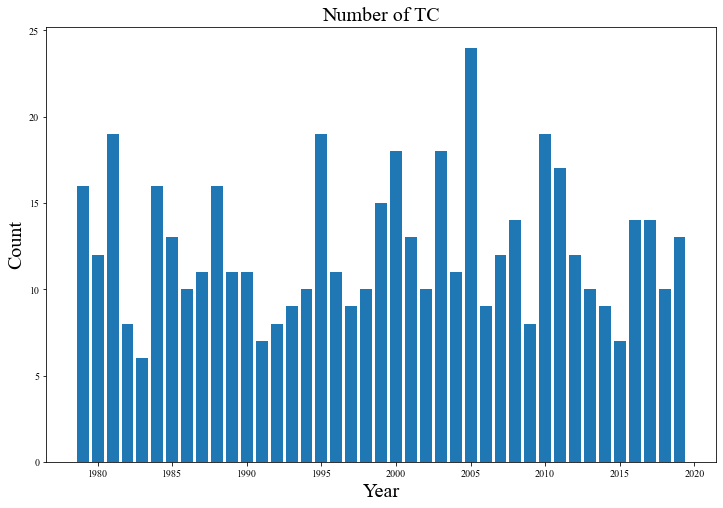

In [20]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.bar(df_num_TC['year'], df_num_TC['count'])
plt.title('Number of TC', fontsize= 20)
plt.ylabel('Count',fontsize= 20)
plt.xlabel('Year',fontsize= 20)
plt.show()

#### Q2.3 (15%) Please perform a 'mean' test to see if the average number of TCs passing by 'Atlantic' increases from the period of 1979 - 1998 to the period of 1999-2019. 

#### Note that you should do a 'variance' test before the 'mean' test to check which mean test scenarios should be used.

In [21]:
from datetime import datetime

dt = pd.to_datetime(df_num_TC['year'], format='%Y')
dt_num =df_num_TC['count']

# Split the data as two parts.
dt_TC = datetime.strptime('1999', '%Y')
dt_TC_p1 = dt_num[dt < dt_TC].reset_index(drop=True)
dt_TC_p2 = dt_num[dt >= dt_TC].reset_index(drop=True)

var_dt_TC_p1 = np.var(dt_TC_p1, ddof=1)
var_dt_TC_p2 = np.var(dt_TC_p2, ddof=1)

var_dt_TC_p1, var_dt_TC_p2

(14.25263157894737, 17.761904761904766)

In [22]:
# Do the variance test first. Because the distribution isn't normal distribution, I use Levene test instead of Bartlett.
stat_levene, p_value_levene = stats.levene(dt_TC_p1, dt_TC_p2, center='median', proportiontocut=0.05)

stat_levene, p_value_levene

# same population variance.


(0.2983443989927933, 0.5880335020842473)

#### Scenario 4 (symmetric case): $\mu_A$ is not known; $\mu_B$ is not known; $\sigma_B= \sigma_A = \sigma$ is not known
1. Null Hypothesis: $ H_0: \mu_A = \mu_B$
2. Alternative Hypothesis: $ H_1: \mu_A > \mu_B$
3. Test statistic: $t = \frac{ (\bar{X}_A - \bar{X}_B)-(\mu_A-\mu_B)} {\widehat{S}_{X_A,X_B} \sqrt{\frac{1}{n_A} +\frac{1}{n_B} } } $
4. Distribution of test statistic: $T \sim t(n_A +n_B -2)$
5. Critical Region $\Re$: $T>t_{n_A+n_B-2,\alpha}$
6. Evaluate $T$ under $H_0$:if $t_0>t_{n_A+n_B-2,\alpha} \Rightarrow$ Reject $H_0$
7. $p-value$: $p(T>t_0)$

where $\widehat{S}_{X_A,X_B}^2 =  \frac{(n_A-1) \widehat{S}_{X_A}^2 +(n_B-1) \widehat{S}_{X_B}^2  }{n_A + n_B - 2}$

In [23]:
# Scenario 4

f_A_mean_sample = np.mean(dt_TC_p1)
f_A_stdev_sample = np.std(dt_TC_p1, ddof=1)

f_B_mean_sample = np.mean(dt_TC_p2)
f_B_stdev_sample = np.std(dt_TC_p2, ddof=1)

stdev_sample_A_B = np.sqrt((((len(dt_TC_p1)-1)*f_A_stdev_sample*f_A_stdev_sample) + ((len(dt_TC_p2)-1)*f_B_stdev_sample*f_B_stdev_sample))/(len(dt_TC_p1)+len(dt_TC_p2)-2))

T = np.abs((f_A_mean_sample - f_B_mean_sample))/(stdev_sample_A_B*np.sqrt(1/len(dt_TC_p1)+1/len(dt_TC_p2)))

df = len(dt_TC_p2)+len(dt_TC_p1)-2

alpha = 0.01
t_alpha = stats.t.ppf(1-alpha,df)

print(f'test statistic T = {T:.4f}')
print(f't_alpha = {t_alpha:.4f}')

p_value = 1-stats.t.cdf(T,df)

if T > t_alpha:
    
    print(f'We have to reject H0, and the p-value is {p_value:.4f}')
else:
    print(f'We have no ground to reject H0, and the p-value is {p_value:.4f}')


test statistic T = 1.2706
t_alpha = 2.4258
We have no ground to reject H0, and the p-value is 0.1057


### Q3. (40%) Identifying those _hotspot_ states prone to be impacted by TCs passing by 'East Pacific' Ocean, and perfoming structural analysis on rainfall data of a given state for a given TC event.

#### Q3.1 (2%) Identify those TC tracks passing by 'East Pacific'

In [24]:
# All the TC from Atlantic
tracks_EastPacific = tracks[tracks['Ocean'] == 'Eastern pacific'].reset_index(drop=True)
tracks_EastPacific

,order,Ocean,Record identifier,Datetime,Cyclone name,Y,X,Max sustained wind speed (kt),Min pressure (millibars)
0,7777,Eastern pacific,EP011979,31/05/1979 18:00,ANDRES,3.222902e+06,-96022.348908,25,-999
1,7778,Eastern pacific,EP011979,01/06/1979 00:00,ANDRES,3.145096e+06,-99360.806490,30,-999
2,7779,Eastern pacific,EP011979,01/06/1979 06:00,ANDRES,3.067274e+06,-102319.471709,30,-999
3,7780,Eastern pacific,EP011979,01/06/1979 12:00,ANDRES,2.988404e+06,-71150.925130,30,-999
4,7781,Eastern pacific,EP011979,01/06/1979 18:00,ANDRES,2.942449e+06,-16279.988755,30,-999
...,...,...,...,...,...,...,...,...,...
11829,30191,Eastern pacific,EP212019,17/11/2019 06:00,TWENTYONE,2.478249e+06,246044.466724,25,1007
11830,30192,Eastern pacific,EP212019,17/11/2019 12:00,TWENTYONE,2.402122e+06,246336.409813,25,1007
11831,30193,Eastern pacific,EP212019,17/11/2019 18:00,TWENTYONE,2.325872e+06,235851.495187,25,1007
11832,30194,Eastern pacific,EP212019,18/11/2019 00:00,TWENTYONE,2.260578e+06,236716.545007,25,1007


#### Q3.2 (10%) Calculate the 'minimum' distance between each TC and each gauges, and export the calculation result to a csv file named _tc-tracks_MX-station_distance_min.csv_. 

#### The format of the csv file is as follow:


TC_ID,00001001,00001003,00001004,00001005,00001006...

EP011979,min_distance,min_distance,min_distance,min_distance,...

EP021979,min_distance,min_distance,min_distance,min_distance,...
...

In [25]:
import math

X = list(station['X'])
Y = list(station['Y'])
len(X)
location = np.array([X,Y]).T
len(location) # There are 5467 stations.
ID_new = list(station['ID'].values)
ID = station['ID'].astype(str).str.zfill(8)
ID_TC = list(ID.values)
ID_TC.insert(0,'TC_ID')

# ID

In [26]:

tracks_name = tracks_EastPacific['Record identifier'].unique() # There are 653 cyclone.

all_distances = []
for TC in tracks_name: # EP0119779, EP021979...
    Cyclone = tracks_EastPacific[tracks_EastPacific['Record identifier'] == TC]
    x_location = list(Cyclone['X'])
    y_location = list(Cyclone['Y'])
    tracks_location = np.array([x_location,y_location]).T
    distances_per_cyclone = []
    for num_station in location: # 00001001, 00001003, 00001004...
        distances = []
        for num_tracks in tracks_location: # All the distances from a cyclone.
            distance = math.dist(num_station, num_tracks)
            distances.append(distance)
        min_distance = min(distances)
        distances_per_cyclone.append(min_distance)
    all_distances.append(distances_per_cyclone)

In [27]:
df_tracks_name = pd.DataFrame(tracks_name)
df_all_distances = pd.DataFrame(all_distances)

df = pd.concat([df_tracks_name,df_all_distances], axis=1, ignore_index=True)
df.columns = ID_TC
df

,TC_ID,00001001,00001003,00001004,00001005,00001006,00001007,00001008,00001009,00001010,...,00032180,00032181,00032182,00032183,00032184,00032186,00032187,00032188,00032189,00032191
0,EP011979,3.610558e+05,3.447185e+05,3.801462e+05,3.502735e+05,3.934003e+05,3.691653e+05,4.027412e+05,3.536915e+05,3.798532e+05,...,3.369164e+05,2.992580e+05,2.925575e+05,3.150981e+05,3.122177e+05,4.529988e+05,4.779232e+05,4.213548e+05,3.712513e+05,5.641478e+05
1,EP021979,1.375120e+06,1.378059e+06,1.392045e+06,1.367190e+06,1.401434e+06,1.387275e+06,1.414551e+06,1.386749e+06,1.409114e+06,...,1.384212e+06,1.342193e+06,1.334769e+06,1.372562e+06,1.362565e+06,1.466755e+06,1.463758e+06,1.411777e+06,1.430138e+06,1.623949e+06
2,EP031979,5.384391e+05,5.251343e+05,5.574578e+05,5.280121e+05,5.702107e+05,5.474426e+05,5.804125e+05,5.341525e+05,5.600409e+05,...,5.186672e+05,4.804949e+05,4.736637e+05,4.967683e+05,4.940458e+05,6.316735e+05,6.520196e+05,5.951772e+05,5.523444e+05,7.354796e+05
3,EP041979,1.258194e+06,1.250802e+06,1.276708e+06,1.248591e+06,1.288296e+06,1.268637e+06,1.299900e+06,1.259832e+06,1.284869e+06,...,1.247972e+06,1.208376e+06,1.201285e+06,1.227916e+06,1.223849e+06,1.352384e+06,1.363132e+06,1.307300e+06,1.284061e+06,1.476213e+06
4,EP051979,1.706194e+06,1.676007e+06,1.724275e+06,1.694875e+06,1.738443e+06,1.710275e+06,1.744012e+06,1.683740e+06,1.709492e+06,...,1.651817e+06,1.627993e+06,1.623503e+06,1.615526e+06,1.627479e+06,1.786159e+06,1.826701e+06,1.773286e+06,1.654046e+06,1.799601e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,EP152019,3.825881e+05,3.453353e+05,3.984715e+05,3.717677e+05,4.123795e+05,3.832238e+05,4.148612e+05,3.518638e+05,3.758458e+05,...,3.155986e+05,3.000851e+05,2.974529e+05,2.771438e+05,2.930301e+05,4.506691e+05,4.987428e+05,4.492487e+05,3.122821e+05,4.500655e+05
649,EP162019,3.239898e+05,2.875205e+05,3.413705e+05,3.127528e+05,3.551101e+05,3.259695e+05,3.569116e+05,2.936941e+05,3.171045e+05,...,2.565037e+05,2.435271e+05,2.414853e+05,2.175873e+05,2.345973e+05,3.902157e+05,4.405981e+05,3.890439e+05,2.379816e+05,3.221706e+05
650,EP192019,2.769507e+05,2.520910e+05,2.955634e+05,2.656638e+05,3.095822e+05,2.824836e+05,3.166213e+05,2.606598e+05,2.871983e+05,...,2.372276e+05,2.041843e+05,1.984331e+05,2.104173e+05,2.118653e+05,3.632915e+05,3.973962e+05,3.429010e+05,2.646804e+05,4.556590e+05
651,EP202019,6.779158e+05,6.371399e+05,6.791691e+05,6.740178e+05,6.854980e+05,6.674814e+05,6.760450e+05,6.353128e+05,6.384917e+05,...,6.006929e+05,6.278327e+05,6.324107e+05,5.751071e+05,6.010755e+05,6.664626e+05,7.272696e+05,7.186673e+05,5.437450e+05,4.873322e+05


In [28]:
fn_data_out = './Files/tc-tracks_MX-station_distance_min.csv'
df.to_csv(fn_data_out, float_format='%.2f', index=0)

#### Q3.2 (10%) For each TC, please find the closest gauge (that is, the gauge with the shorest 'minimum' distance to a given TC) and identify the corresponding State this gauge belonging to. Finally, please count the number of  the closest gauges for all TCs passing by 'East Pacific' ocean for each State and export the counts to a csv filen named _tc-rg-counts_ep_MX.csv_.

#### The format of the output csv is as follow:

State,Count

BAJA CALIFORNIA,8

BAJA CALIFORNIA SUR,65
...

In [29]:

df_all_distances.columns = ID_new
# df_all_distances

In [30]:
mins = list(df_all_distances.idxmin(axis=1))
state_number = []
for id in mins:
    state = station[station['ID']  == id].reset_index()
    # print(state)
    # print(state.at[0, 'State'])
    state_number.append(state.at[0, 'State'])

# state_number

In [31]:
num_state_number = Counter(state_number)
df_num_num_state_number = pd.DataFrame.from_dict(num_state_number, orient='index').reset_index()
df_num_num_state_number.rename(columns={'index':'State', 0:'Count'}, inplace=True)
df_num_num_state_number.sort_values(['Count'], ascending=[True], inplace=True)
df_num_num_state_number.reset_index(inplace=True, drop=True)
df_num_num_state_number

,State,Count
0,CHIHUAHUA,1
1,MORELOS,1
2,COAHUILA DE ZARAGOZA,1
3,ZACATECAS,1
4,DURANGO,5
5,SONORA,5
6,NAYARIT,7
7,BAJA CALIFORNIA,8
8,CHIAPAS,12
9,SINALOA,14


In [32]:
fn_data_out1 ='./Files/tc-rg-counts_ep_MX.csv'
df_num_num_state_number.to_csv(fn_data_out1, index=0)

#### Q3.3 (5%) From the counts, you shall be able to find that one of the hotspot states is named 'SINALOA'. Please import rainfall data for those gauges belonging to 'SINALOA' state only from the _MX_SAT-RG_data.csv_ file, and calculate rainfall sum for these gauges for a TC event passing by 'East Pacific' Ocean, named 'JULIETTE' (the Record identifier is EP112001). 

In [33]:
SINALOA = station[station['State'] == 'SINALOA']
SINALOA_ID = SINALOA['ID'].astype(str).str.zfill(8)
SINALOA_ID = list(SINALOA_ID.values)
SINALOA_ID.append('date')

TC = pd.read_csv('./Files/MX_SAT-RG_data.csv', usecols=SINALOA_ID)
TC['date'] = pd.to_datetime(TC['date'] , format='%Y/%m/%d')
TC = TC.set_index(['date'])
# TC

In [34]:
tracks_Juliette = tracks[tracks['Record identifier']=='EP112001'] # from 2001/09/21 to 2001/10/03 

# Split the data
TC_Juliett_date = TC['2001-09-21':'2001-10-02']

# The rainfall in each gauge 
rain_sum_Juliette = TC_Juliett_date.sum(axis=0)
rain_sum_Juliette = pd.DataFrame(rain_sum_Juliette)
rain_sum_Juliette.rename(columns={0:'rain'}, inplace=True)
rain_sum_Juliette

,rain
00025001,52.200159
00025002,60.165381
00025003,109.404985
00025004,118.003752
00025005,61.196630
...,...
00025186,64.623029
00025188,61.366206
00025190,65.427510
00025191,71.809359


#### Q3.4 (8%) Please perform structal analsys on the rainfall sum values for these gauges for the TC event 'JULIETTE' (the Record identifier is EP112001). This can be done by computing emprical variogram of the rainfall sums collected from the gauges and fitting the variogram. You may want to try several variogram models to the find the most suitable one. 

#### Please plot the empirical and the fitting variogram into a single chart, and print out the variogram model you decide to use and the resulting parameters of this variogram model.

In [35]:
import gstools as gs

X = SINALOA['X']
Y = SINALOA['Y']

data_rain = rain_sum_Juliette['rain']
bin_center, gamma_rain =gs.variogram.vario_estimate((X, Y), data_rain)

bin_center, gamma_rain


(array([  6530.33649967,  19591.00949901,  32651.68249835,  45712.35549769,
         58773.02849703,  71833.70149637,  84894.37449571,  97955.04749505,
        111015.72049439, 124076.39349373, 137137.06649307, 150197.7394924 ,
        163258.41249174, 176319.08549108, 189379.75849042, 202440.43148976]),
 array([ 104.60642652,  656.18078054, 1200.07958742, 1788.94185761,
        2032.07793983, 2406.91938312, 2270.99268659, 2331.99137423,
        2352.07482109, 2071.19018038, 2056.09989193, 2529.10698293,
        2378.66380987, 2319.25046284, 2145.69811412, 2157.24934366]))

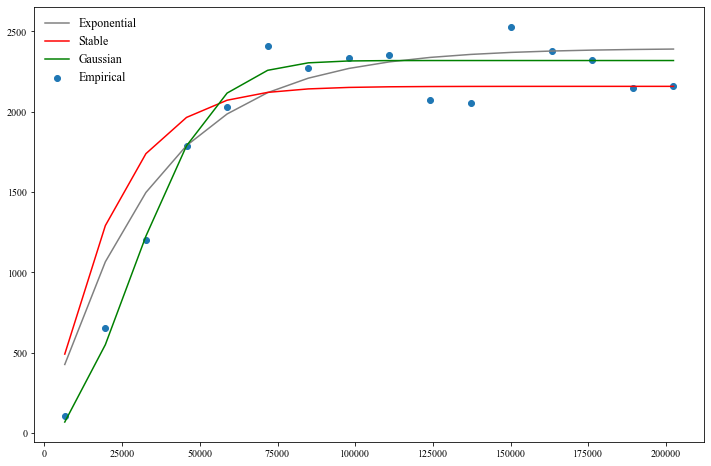

Exponential(dim=2, var=2.4e+03, len_scale=3.33e+04, nugget=0.0)
Stable(dim=2, var=2.16e+03, len_scale=2.12e+04, nugget=0.0, alpha=1.15)
Gaussian(dim=2, var=2.32e+03, len_scale=3.34e+04, nugget=0.0)


In [36]:
gamma = gamma_rain

fit_model_stable = gs.Stable(dim=2)
fit_model_stable.fit_variogram(bin_center, gamma, nugget=False)

fit_model_exp = gs.Exponential(dim=2)
fit_model_exp.fit_variogram(bin_center, gamma, nugget=False)

fit_model_gauss = gs.Gaussian(dim=2)
fit_model_gauss.fit_variogram(bin_center, gamma, nugget=False)

fig=plt.figure(figsize=(12, 8))
plt.rcParams["font.family"] = "Times New Roman"
ax=fig.add_subplot(111)

ax.plot(bin_center, fit_model_exp.variogram(bin_center), color='grey', label='Exponential')
ax.plot(bin_center, fit_model_stable.variogram(bin_center), color='red', label='Stable')
ax.plot(bin_center, fit_model_gauss.variogram(bin_center), color='green', label='Gaussian')


ax.scatter(bin_center, gamma, label='Empirical')

plt.legend(frameon=False, fontsize=12)
plt.show()
print(fit_model_exp)
print(fit_model_stable)
print(fit_model_gauss)

# Gaussian distribution is the best fitting model.

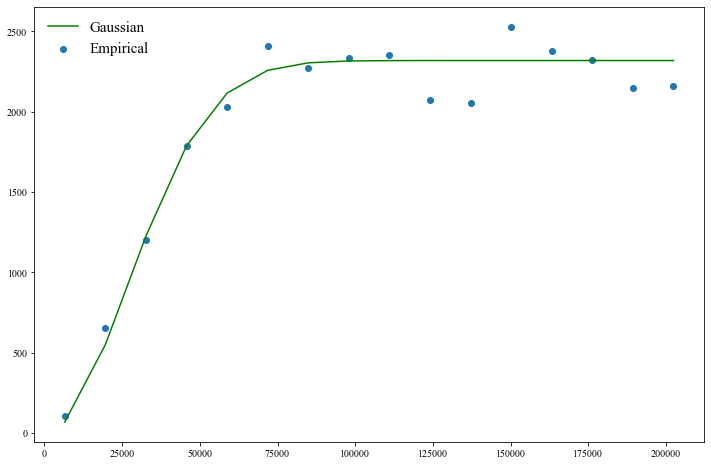

Gaussian(dim=2, var=2.32e+03, len_scale=3.34e+04, nugget=0.0)


In [37]:
# Gaussian
fig=plt.figure(figsize=(12, 8))
plt.rcParams["font.family"] = "Times New Roman"
ax=fig.add_subplot(111)

ax.plot(bin_center, fit_model_gauss.variogram(bin_center), color='green', label='Gaussian')
ax.scatter(bin_center, gamma, label='Empirical')

plt.legend(frameon=False, fontsize=15, loc='upper left')
plt.show()
print(fit_model_gauss)

#### Q3.5 (5%) Please use ordinary kriging to generate a 'structured' field based upon the structure analysis. The domain of the field is:

#### X axis ranges from 1150000 to 1650000 and the interval is 5000 (in metres)
#### Y axis ranges from 1750000 to 2150000 and the interval is 5000 (in metres)

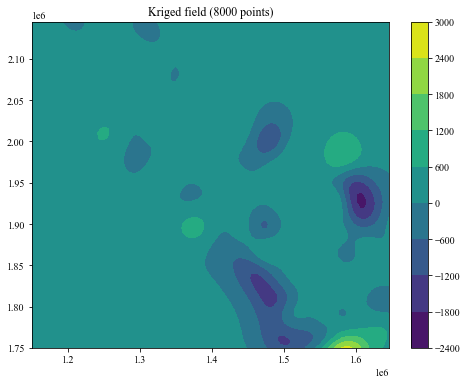

In [38]:
# conditioning data
X = SINALOA['X']
Y = SINALOA['Y']
data_rain

# grid definition for output field
x = range(1150000, 1650000, 5000) # 100
y = range(1750000, 2150000, 5000) # 80

nsamples = 80*100

krige = gs.krige.Ordinary(fit_model_gauss, (X, Y), data_rain)

cond_srf = gs.CondSRF(krige)

kriged_field = krige.structured([x, y])

# Plot rain_map first
plt.rcParams["figure.figsize"] = (8,6)
x_mesh, y_mesh = np.meshgrid(x, y)
plt_ctrl=plt.contourf(x_mesh.T, y_mesh.T,kriged_field[0])
plt.colorbar(plt_ctrl,orientation='vertical')
plt.title(f'Kriged field ({nsamples} points)')
plt.set_cmap(cmap=plt.get_cmap('viridis'))

# The result from gaussian is not well. So, We should try exponential and stable fitting models.

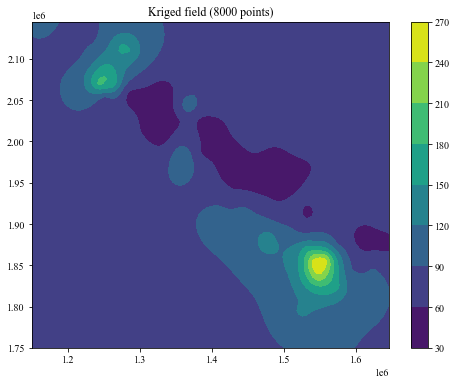

In [39]:
# conditioning data
X = SINALOA['X']
Y = SINALOA['Y']
data_rain

# grid definition for output field
x = range(1150000, 1650000, 5000) # 100
y = range(1750000, 2150000, 5000) # 80

nsamples = 80*100

krige = gs.krige.Ordinary(fit_model_stable, (X, Y), data_rain)

cond_srf = gs.CondSRF(krige)

kriged_field = krige.structured([x, y])

# Plot rain_map first
plt.rcParams["figure.figsize"] = (8,6)
plt_ctrl=plt.contourf(x, y,kriged_field[0].T)
plt.colorbar(plt_ctrl,orientation='vertical')
plt.title(f'Kriged field ({nsamples} points)')
plt.set_cmap(cmap=plt.get_cmap('viridis'))

# exponential is better than gaussian.


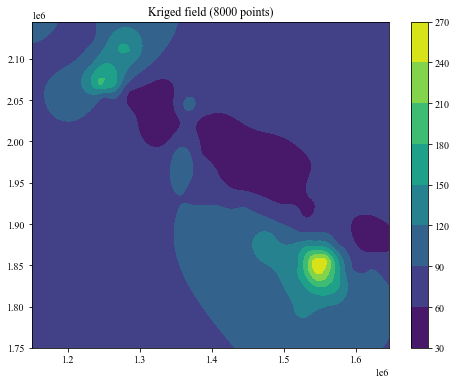

In [40]:
# conditioning data
X = SINALOA['X']
Y = SINALOA['Y']

# grid definition for output field
x = range(1150000, 1650000, 5000) # 100
y = range(1750000, 2150000, 5000) # 80

nsamples = 80*100

krige = gs.krige.Ordinary(fit_model_exp, (X, Y), data_rain)

cond_srf = gs.CondSRF(krige)

kriged_field = krige.structured([x, y])

# Plot rain_map first
plt.rcParams["figure.figsize"] = (8,6)

plt_ctrl=plt.contourf(x, y,kriged_field[0].T)
plt.colorbar(plt_ctrl,orientation='vertical')
plt.title(f'Kriged field ({nsamples} points)')
plt.set_cmap(cmap=plt.get_cmap('viridis'))

# Stable is better than gaussian too.
# the fitting in lower left side isn't well. I think it might be affected by geographical limitations, beacause they don't have gauges on the ocean. 

### Q4. (10% bonus) download satellite data and make some plots. 

#### Please download IMERG daily rainfall data files for the TC 'JULIETTE' (the Record identifier is EP112001), and calculate rainfall sum at each pixel and plot the resulting field of rainfall sums.  

#### Hints:

#####  You can do this with the .bash script provided in this course or your own way. But you will face a challenge -- You need to figure out the domain that is required to download the script. That is, you need to the update the following variables in the .bash script.

lat_l=7
lat_t=27
lon_l=-100
lon_t=-80

##### Please note that the values for the above variables are Lattitude and Longitude in degree (the so called WGS 84 coordinate system: https://epsg.io/4326), but in the data files used above, all the coordinates provided are in X and Y in metres (in the local Mexico coordinate system: Mexico ITRF 2008 https://epsg.io/6372). So you have to do a transformation of the coordinate systems to convert the following domain to Latitude and Longitude before running the .bash script. 

##### X axis ranges from 1150000 to 1650000 and the interval is 5000 (in metres)
##### Y axis ranges from 1750000 to 2150000 and the interval is 5000 (in metres)

##### To do the transformation, you may refer to this example: https://pyproj4.github.io/pyproj/stable/advanced_examples.html


In [41]:
from pyproj import Transformer, transform

# Transform the coordinate from 6372 to 4326.
transformer = Transformer.from_crs("epsg:6372", "epsg:4326")
transformer.transform(1150000, 1750000)

(22.197460280937758, -109.31418696439518)

In [42]:
transformer = Transformer.from_crs("epsg:6372", "epsg:4326")
transformer.transform(1650000, 2150000)

(26.86867965618945, -105.53587803155679)

In [43]:
import netCDF4 as nc

In [44]:
def ncdump(nc_fid, to_print=True):
    '''
    ncdump outputs dimensions, variables and their attribute information

    Parameters
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    to_print : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print('\t\t%s:' % ncattr, repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print("\t\tWARNING: %s does not contain variable attributes" % key)

    # NetCDF global attributes
    nc_attrs = nc_fid.ncattrs()
    if to_print:
        print("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # Dimension shape information.
    if to_print:
        print("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim) 
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Variable information.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if to_print:
        print("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print('\tName:', var)
                print("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars

In [45]:
# Create a time range.
datarange=[ d.strftime('%Y%m%d') for d in pd.date_range('9/21/2001','10/2/2001', freq='D') ]
datarange

# Read files and sum all of the rainfall in each location.
rain_IMERG =np.zeros((38,47))
for i in datarange:
    nc_fid = nc.Dataset(f"C:/Users/user/Desktop/data/IMERG/3B-DAY-L.MS.MRG.3IMERG.{i}-S000000-E235959.V06.nc4.nc4") 
    rain = nc_fid.variables['precipitationCal'][:,:,:]
    rain_map = rain[0,:,:].copy() # Create a rainmap variable (2D), which is a copy of the 0th element of the 3D array rain
    rain_IMERG = rain_IMERG + rain_map
    lat = nc_fid.variables['lat'][:]
    lon = nc_fid.variables['lon'][:]

rain_IMERG =  rain_IMERG. T # Do transpose to move 'lon' to the 2nd dimension, and 'lat' to the 1st dimension

<ipython-input-45-2417d1bb15c6>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rain = nc_fid.variables['precipitationCal'][:,:,:]
<ipython-input-45-2417d1bb15c6>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = nc_fid.variables['lat'][:]
<ipython-input-45-2417d1bb15c6>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin

In [46]:
# Use ncdump fucntion to get info for all attritues, dimensions and variables
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid, to_print=True)

NetCDF Global Attributes:
	CDI: 'Climate Data Interface version 1.9.8 (https://mpimet.mpg.de/cdi)'
	Conventions: 'CF-1.6'
	BeginDate: '2001-10-02'
	BeginTime: '00:00:00.000Z'
	EndDate: '2001-10-02'
	EndTime: '23:59:59.999Z'
	FileHeader: 'StartGranuleDateTime=2001-10-02T00:00:00.000Z;\nStopGranuleDateTime=2001-10-02T23:59:59.999Z'
	InputPointer: '3B-HHR-L.MS.MRG.3IMERG.20011002-S000000-E002959.0000.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S003000-E005959.0030.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S010000-E012959.0060.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S013000-E015959.0090.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S020000-E022959.0120.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S023000-E025959.0150.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S030000-E032959.0180.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S033000-E035959.0210.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S040000-E042959.0240.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG.20011002-S043000-E045959.0270.V06B.HDF5;3B-HHR-L.MS.MRG.3IMERG

<ipython-input-44-82fbe55c0e08>:42: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
<ipython-input-44-82fbe55c0e08>:33: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print('\t\t%s:' % ncattr, repr(nc_fid.variables[key].getncattr(ncattr)))


In [47]:
rain_IMERG.max()

378.22565138339996

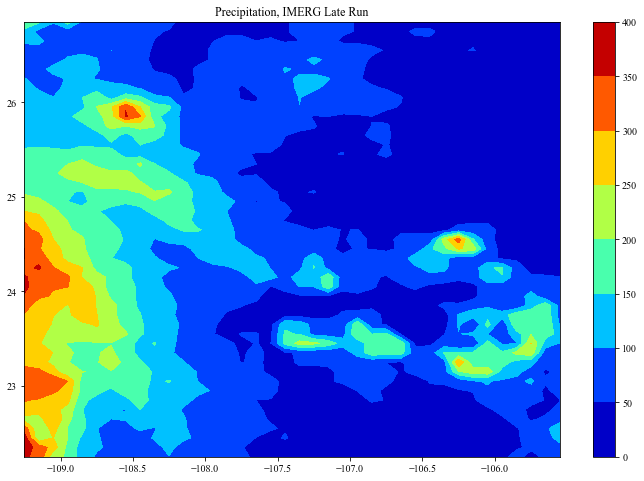

In [48]:
plt.rcParams["figure.figsize"] = (12,8)

# Use contourf to plot rain_map
plt_ctrl=plt.contourf(lon,lat,rain_IMERG)
plt.colorbar(plt_ctrl,orientation='vertical')
plt.title('Precipitation, IMERG Late Run')
plt.set_cmap(cmap=plt.get_cmap('jet'))

### Good luck with the assignment!